# Pillow (`PIL` module) demonstrations

David Dumas

## Importing the module

In [16]:
import PIL

## Loading

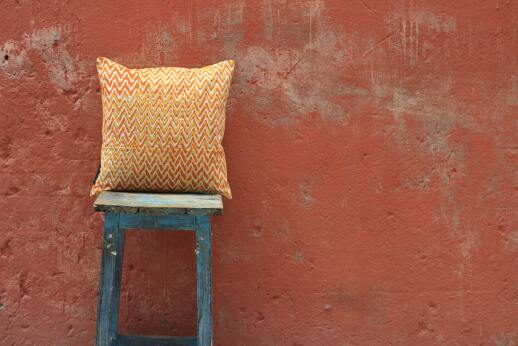

In [22]:
# Let's open a JPEG photo
# This is a resized version of the photo from https://unsplash.com/photos/iHOZTi2niV4
# which is licensed for use without attribution, and allows modification.
img = PIL.Image.open("pillow-photo.jpg")
img

## Converting

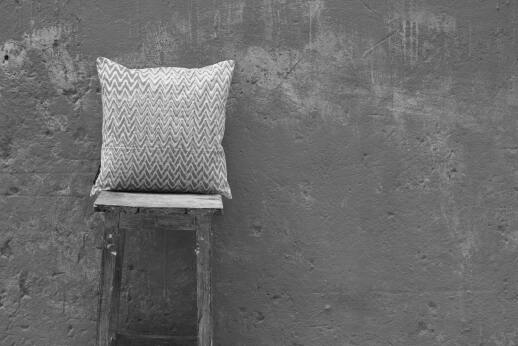

In [19]:
# To grayscale
# Note: .convert returns a new image
img_gray = img.convert("L")
img_gray.save("pillow-photo-gray.png")  # Write grayscale version to a PNG file
img_gray

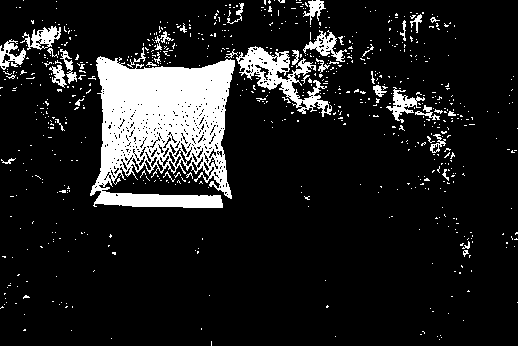

In [132]:
# To black and white (1-bit)
img_bw = img.convert("1",dither=PIL.Image.NONE)
img_bw

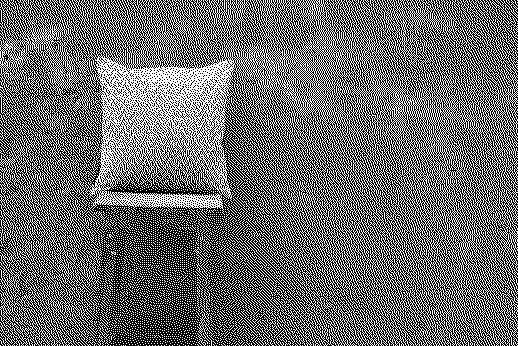

In [134]:
# To black and white (1-bit)
# Without passing `dither=PIL.Image.NONE`, it uses patterned black/white pixels
# to give the impression of shades of gray.  This is called dithering.
# Your browser may resize the image a bit (making it smaller) resulting in some
# *actual* gray pixels being shown.
img_bw = img.convert("1")
img_bw

## Cropping

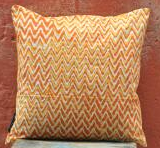

In [35]:
# crop returns a new image
img_portion = img.crop( (85,52,245,200) )  # 4-tuple is (left_x, top_y, right_x, bottom_y)
img_portion

In [135]:
# Check the size of the cropped portion
w,h = img_portion.size
w,h

(160, 148)

## Resizing

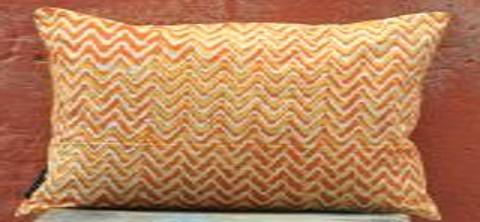

In [136]:
# Resize returns a new image; it isn't a mutation!
w,h = img_portion.size
img_portion.resize( (3*w,int(1.5*h)) ) # (new width, new height)
# This is 3 times as wide, 1.5 times as tall
# Dimensions must be integers

## Rotating and mirroring

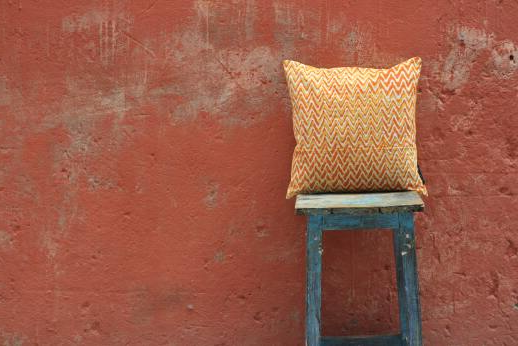

In [44]:
img.transpose(PIL.Image.FLIP_LEFT_RIGHT)

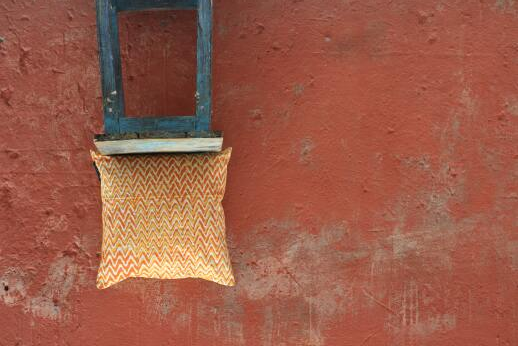

In [45]:
img.transpose(PIL.Image.FLIP_TOP_BOTTOM)

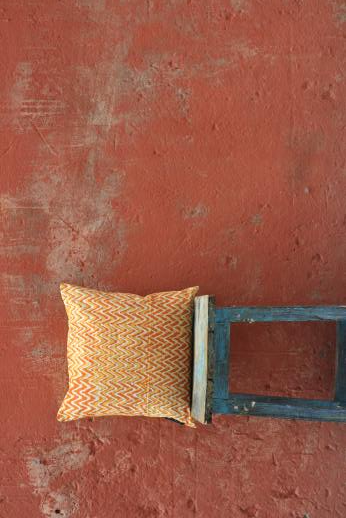

In [46]:
img.transpose(PIL.Image.ROTATE_90)

Other supported flips/rotations:
* `PIL.Image.FLIP_LEFT_RIGHT`
* `PIL.Image.FLIP_TOP_BOTTOM`
* `PIL.Image.ROTATE_90`
* `PIL.Image.ROTATE_180`
* `PIL.Image.ROTATE_270`
* `PIL.Image.TRANSPOSE`
* `PIL.Image.TRANSVERSE`

## New blank image

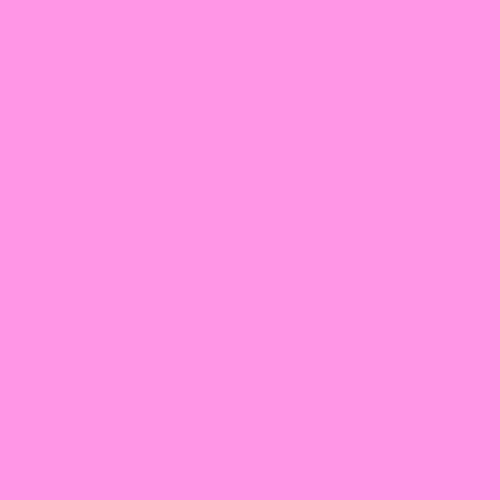

In [70]:
# arguments to Image.new are:  mode, size, color
canvas = PIL.Image.new( "RGB", (500,500), (255,150,230) )
canvas

## Pasting

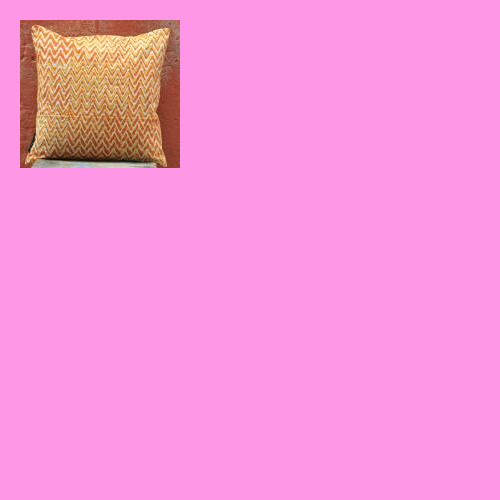

In [129]:
# recall img_portion is the cropped pillow image

# paste modifies the image it is called on; it is a mutation
canvas = PIL.Image.new( "RGB", (500,500), (255,150,230) )
canvas.paste(img_portion, (20,20))  # dest.paste(src, upperleft_coords)
canvas

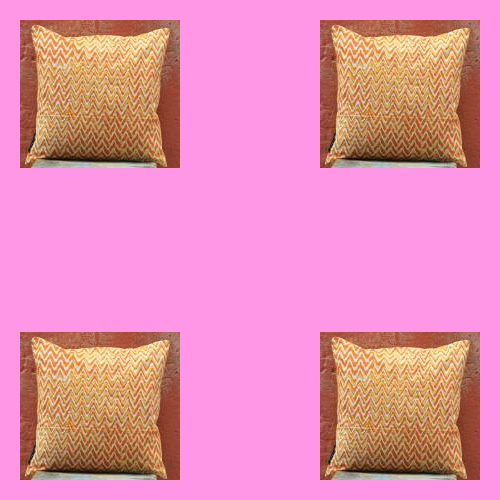

In [130]:
w,h = img_portion.size
canvas.paste(img_portion, (500-w-20,20))
canvas.paste(img_portion, (20,500-h-20))
canvas.paste(img_portion, (500-w-20,500-h-20))
canvas

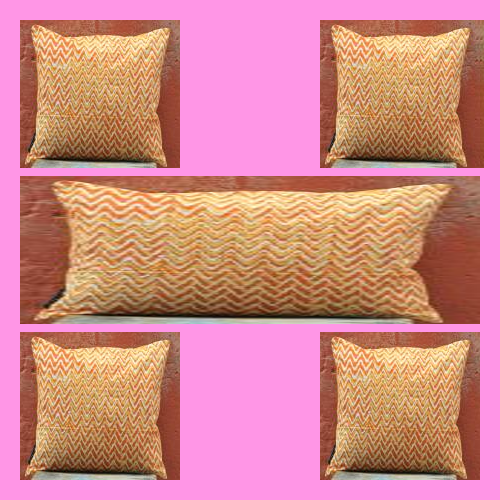

In [77]:
canvas.paste(img_portion.resize( (500-20-20,h) ), (20,(500 - h)//2) )
canvas

## Per-pixel color setting

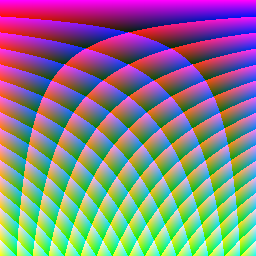

In [93]:
canvas = PIL.Image.new( "RGB", (256,256) )
for x in range(256):
    for y in range(256):
        red = 255 - (x*y)//16 % 256 # bands of red along hyperbolas x*y=const
        green = y
        blue = 255 - ((256-x)*y) // 16 % 256 # bands of blue along hyperbolas (256-x)*y=const
        canvas.putpixel( (x,y), (red,green,blue) )
canvas

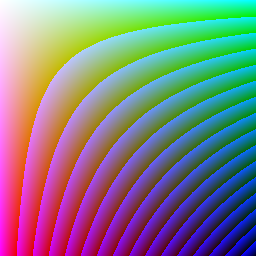

In [96]:
# Another nice color pattern
for x in range(256):
    for y in range(256):
        red = 255-x
        green = 255-y
        blue = 255 - ((x*y // 16) % 256)
        canvas.putpixel( (x,y), (red,green,blue) )
canvas

## Drawing a random walk

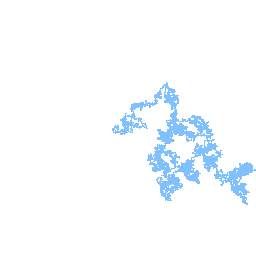

In [105]:
# First version: Just show every place the walk visits
import random

canvas = PIL.Image.new( "RGB", (256,256), (255,255,255) )
x=128
y=128
pathcolor=(128,192,255)
for i in range(20000):
    try:
        canvas.putpixel((x,y),pathcolor)
    except IndexError:
        break
    dx,dy = random.choice([(-1,0),(1,0),(0,-1),(0,1)])
    x += dx
    y += dy
canvas

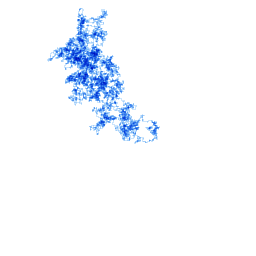

In [110]:
# Improved: Darken a pixel every time the walk steps on it
import random

canvas = PIL.Image.new( "RGB", (256,256), (255,255,255) )
x=128
y=128
for i in range(20000):
    try:
        r,g,b = canvas.getpixel( (x,y) )
        canvas.putpixel((x,y),(int(r*0.8),int(g*0.9),int(b*0.99)))
    except IndexError:
        break
    dx,dy = random.choice([(-1,0),(1,0),(0,-1),(0,1)])
    x += dx
    y += dy
canvas

## Drawing a spiral

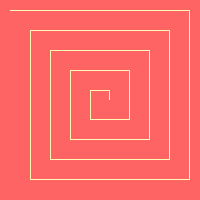

In [137]:
import random

canvas = PIL.Image.new( "RGB", (200,200), (255,100,100) )
x=10
y=10
steplen = 180
steps = 0
diridx = 0
directions = [ (1,0), (0,1), (-1,0), (0,-1) ]

while True:
    canvas.putpixel((x,y),(250,250,180))
    steps += 1
    if steps == steplen:
        steps = 0
        diridx = (diridx + 1) % 4
        steplen -= 10
        if steplen <= 0:
            break
    else:
        dx,dy = directions[diridx]
        x += dx
        y += dy
canvas.save("spiral.png") # save to a file
canvas

## Animated spiral

In [144]:
import random

canvas = PIL.Image.new( "RGB", (200,200), (255,100,100) )
x=10
y=10
steplen = 180
steps = 0
diridx = 0
directions = [ (1,0), (0,1), (-1,0), (0,-1) ]
frames = []

while True:
    if steps == 0:
        frames.append(canvas.copy())
    canvas.putpixel((x,y),(250,250,180))
    steps += 1
    if steps == steplen:
        steps = 0
        diridx = (diridx + 1) % 4
        steplen -= 10
        if steplen <= 0:
            break
    else:
        dx,dy = directions[diridx]
        x += dx
        y += dy
frames[0].save("spiral.gif",save_all=True,append_images=frames[1:],loop=0,duration=100)

If you load a GIF with pillow and evaluate the object in a notebook cell, you'll only see the first frame.  But here is the full animation created above (embedded here using the notebook environment's support for including images from files).

![The animated gif made above](spiral.gif)

There are some weird dithering artifacts (red dots), which I think is due to standard GIF files only allowing 256 colors.  Some other GIF creation programs may choose an adapted color palette (which would be great for our image, which only uses two colors) and/or take advantage of GIFs allowing a new palette for each frame.

## The trouble with JPEGs

Never use JPEG for images with sharp boundaries between black and white regions, or between other contrasting colors.  (In photographs, such a transition is always spread over a few pixels, at least.)

Let's make an image with complex detail and lots of sharp black-to-white transitions to demonstrate this.

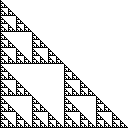

In [171]:
cache = {0:1, 1:1}
def fact(n):
    if n in cache:
        return cache[n]
    res= n*fact(n-1)
    cache[n]=res
    return res

def binom(n,k):
    return fact(n) // (fact(k)*fact(n-k))

img = PIL.Image.new("L",(128,128),(255,))
for y in range(128):
    for x in range(y+1):
        t = 255*(1-(binom(y,x) % 2))
        img.putpixel((x,y), t)
img

In [172]:
# Save with "pretty good" quality setting for photos
img.save("gasket90.jpg",quality=90)
# Save with extreme space-saving quality setting
img.save("gasket10.jpg",quality=10)

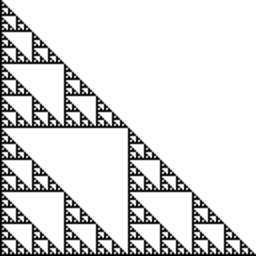

In [174]:
PIL.Image.open("gasket90.jpg").resize((256,256))
# This one looks OK, but has a tiny bit of light gray around the sharp black lines
# We zoom in 200% to make details clear

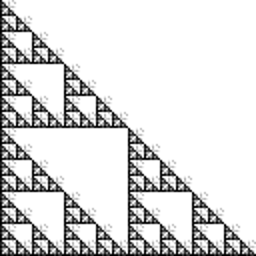

In [175]:
PIL.Image.open("gasket10.jpg").resize((256,256))
# This one looks bad!  All sorts of weird gray stuff around the sharp black/white lines
# Critical image data was discarded.
# Again, we zoom in 200% to make details clear